# ChatInterface 聊天界面组件

高级布局组件，提供用户友好的前端界面，用于输入不同类型的消息：文本、图片、PDF等。该组件提供前端方法来：
- 输入(附加)消息到聊天记录
- 重新运行(重新发送)最近的用户输入消息
- 删除消息直到上一个用户输入消息
- 清空聊天记录，删除所有消息

底层实现为`panel.chat.ChatInterface`，参数基本一致，参考文档：https://panel.holoviz.org/reference/chat/ChatInterface.html

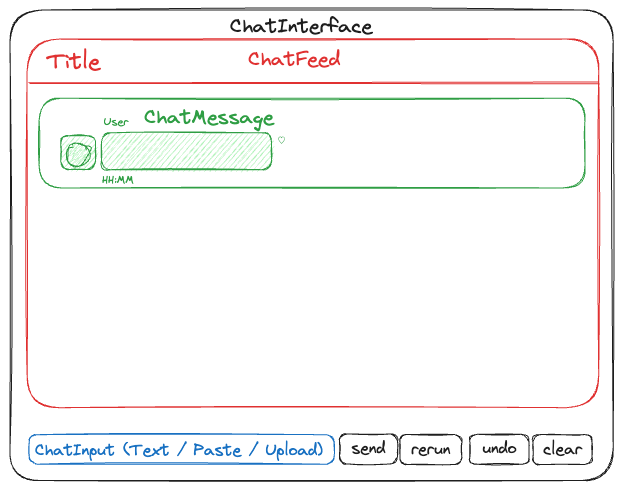

In [1]:
##ignore
%load_ext vuepy
from panel_vuepy import vpanel


## 基本用法

基本的聊天界面组件：


In [2]:
%%vuepy_run --plugins vpanel --show-code
<template>
<PnChatInterface 
  v-model='messages.value'
  :callback="get_response" user='Asker' avatar='?' 
  @change='on_change'
/>
<p> messages: {{ messages.value }}</p>
</template>
<script lang='py'>
from vuepy import ref
import asyncio

messages = ref([])

def on_change(event):
    print('onchange', event.new)

async def get_response(contents, user, instance):
    print(contents, user, instance) # hello Asker ChatInterface...
    await asyncio.sleep(0.5)  # Simulate processing
    return f"Got your message: {contents}"
</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n<PnChatInterface \n  v-model='messages.value'\n  :callback=\"get_response\" user='Asker' avatar='?' \n  @change='on_change'\n/>\n<p> messages: {{ messages.value }}</p>\n</template>\n<script lang='py'>\nfrom vuepy import ref\nimport asyncio\n\nmessages = ref([])\n\ndef on_change(event):\n    print('onchange', event.new)\n\nasync def get_response(contents, user, instance):\n    print(contents, user, instance) # hello Asker ChatInterface...\n    await asyncio.sleep(0.5)  # Simulate processing\n    return f\"Got your message: {contents}\"\n</script>\n", "setup": ""}



## 输入组件

可以自定义输入组件，支持多种输入类型：


In [3]:
%%vuepy_run --plugins vpanel --show-code --codegen-backend='panel'
<template>
<PnChatInterface :callback="get_num">
  <template #inputs>
    <PnIntSlider name='Number Input' :end='10' />
    <PnIntSlider name='Number Input2' :end='10' />
  </template>
</PnChatInterface>
</template>
<script lang='py'>
from vuepy import ref
import panel as pn

def get_num(contents, user):
    return f"You selected: {contents}"
</script>

{"vue": "<!-- --plugins vpanel --show-code --codegen-backend='panel' -->\n<template>\n<PnChatInterface :callback=\"get_num\">\n  <template #inputs>\n    <PnIntSlider name='Number Input' :end='10' />\n    <PnIntSlider name='Number Input2' :end='10' />\n  </template>\n</PnChatInterface>\n</template>\n<script lang='py'>\nfrom vuepy import ref\nimport panel as pn\n\ndef get_num(contents, user):\n    return f\"You selected: {contents}\"\n</script>\n", "setup": ""}


Column(name='root')
    [0] Column(name='body')
        [0] Column
            [0] ChatInterface(_button_data={'send': _ChatButtonData(i...}, _buttons={'send': Button(align='cen...}, _input_container=Row, _input_layout=Tabs, _placeholder=ChatMessage, _widgets={'Number Input': IntSlider...}, callback=<function setup.<locals>.g..., show_button_name=True, sizing_mode='stretch_width', widgets=[IntSlider(css_classes=['c...])


可以添加文件上传等其他输入组件：


In [4]:
%%vuepy_run --plugins vpanel --show-code --codegen-backend='panel'
<template>
<!-- use widgets prop -->
<PnChatInterface :callback="handle_file" 
  :widgets="[
    pn.widgets.FileInput(name='CSV File', accept='.csv')
  ]"
/>
<!-- use inputs slot -->
<PnChatInterface :callback="handle_file">
  <template #inputs>
    <PnFileInput name='CSV File' accept='.csv' />
  </template>
</PnChatInterface>
</template>
<script lang='py'>
from vuepy import ref
import panel as pn

def handle_file(contents, user):
    if hasattr(contents, 'filename'):
        return f"Received file: {contents.filename}"
    return "Please upload a file"
</script>

{"vue": "<!-- --plugins vpanel --show-code --codegen-backend='panel' -->\n<template>\n<!-- use widgets prop -->\n<PnChatInterface :callback=\"handle_file\" \n  :widgets=\"[\n    pn.widgets.FileInput(name='CSV File', accept='.csv')\n  ]\"\n/>\n<!-- use inputs slot -->\n<PnChatInterface :callback=\"handle_file\">\n  <template #inputs>\n    <PnFileInput name='CSV File' accept='.csv' />\n  </template>\n</PnChatInterface>\n</template>\n<script lang='py'>\nfrom vuepy import ref\nimport panel as pn\n\ndef handle_file(contents, user):\n    if hasattr(contents, 'filename'):\n        return f\"Received file: {contents.filename}\"\n    return \"Please upload a file\"\n</script>\n", "setup": ""}


Column(name='root')
    [0] Column(name='body')
        [0] Column
            [0] Column
                [0] ChatInterface(_button_data={'send': _ChatButtonData(i...}, _buttons={'send': Button(align='cen...}, _input_container=Row, _input_layout=Row, _placeholder=ChatMessage, _widgets={'CSV File': FileInput(acc...}, callback=<function setup.<locals>.h..., show_button_name=True, sizing_mode='stretch_width', widgets=[FileInput(accept='.csv', ...])
                [1] ChatInterface(_button_data={'send': _ChatButtonData(i...}, _buttons={'send': Button(align='cen...}, _input_container=Row, _input_layout=Row, _placeholder=ChatMessage, _widgets={'CSV File': FileInput(acc...}, callback=<function setup.<locals>.h..., show_button_name=True, sizing_mode='stretch_width', widgets=[FileInput(accept='.csv', ...])


可以使用 `reset_on_send` 参数控制发送后是否重置输入值：


In [5]:
%%vuepy_run --plugins vpanel --show-code
<template>
<PnChatInterface 
  :callback="echo_message"
  :reset_on_send="False"
/>
</template>
<script lang='py'>
from vuepy import ref

def echo_message(contents):
    return f"Echo: {contents}"
</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n<PnChatInterface \n  :callback=\"echo_message\"\n  :reset_on_send=\"False\"\n/>\n</template>\n<script lang='py'>\nfrom vuepy import ref\n\ndef echo_message(contents):\n    return f\"Echo: {contents}\"\n</script>\n", "setup": ""}



## 按钮控制

可以通过 `show_rerun`、`show_undo`、`show_clear` 等参数控制底部按钮的显示：


In [6]:
%%vuepy_run --plugins vpanel --show-code
<template>
<PnChatInterface 
  :callback="get_response"
  :show_rerun="False"
  :show_undo="False"
/>
</template>
<script lang='py'>
from vuepy import ref

def get_response(contents):
    return f"Got: {contents}"
</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n<PnChatInterface \n  :callback=\"get_response\"\n  :show_rerun=\"False\"\n  :show_undo=\"False\"\n/>\n</template>\n<script lang='py'>\nfrom vuepy import ref\n\ndef get_response(contents):\n    return f\"Got: {contents}\"\n</script>\n", "setup": ""}



使用 `show_button_name=False` 可以隐藏按钮标签，创建更紧凑的界面：


In [7]:
%%vuepy_run --plugins vpanel --show-code
<template>
<PnChatInterface 
  :callback="get_response"
  :show_button_name="False"
  :width="400"
/>
</template>
<script lang='py'>
from vuepy import ref

def get_response(contents):
    return f"Got: {contents}"
</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n<PnChatInterface \n  :callback=\"get_response\"\n  :show_button_name=\"False\"\n  :width=\"400\"\n/>\n</template>\n<script lang='py'>\nfrom vuepy import ref\n\ndef get_response(contents):\n    return f\"Got: {contents}\"\n</script>\n", "setup": ""}



可以通过 `button_properties` 添加自定义功能按钮：


In [8]:
%%vuepy_run --plugins vpanel --show-code
<template>
<PnChatInterface 
  ref='chat_ref'
  :button_properties="{
    # new button
    'help': {
      'icon': 'help','callback': show_notice,
    },
    # override clear button 
    'clear': {
        'icon': 'star', 'callback': run_before, 'post_callback': run_after,
    },
  }"
/>
</template>
<script lang='py'>
from vuepy import ref

chat_ref = ref(None)

def show_notice(instance, event):
    instance.send("This is how you add buttons!", respond=False, user="System")

def run_before(instance, event):
    instance.send(
        "This will be cleared so it won't show after clear!",
        respond=False,
        user="System",
    )

def run_after(instance, event):
    instance.send("This will show after clear!", respond=False, user="System")

</script>

{"vue": "<!-- --plugins vpanel --show-code -->\n<template>\n<PnChatInterface \n  ref='chat_ref'\n  :button_properties=\"{\n    # new button\n    'help': {\n      'icon': 'help','callback': show_notice,\n    },\n    # override clear button \n    'clear': {\n        'icon': 'star', 'callback': run_before, 'post_callback': run_after,\n    },\n  }\"\n/>\n</template>\n<script lang='py'>\nfrom vuepy import ref\n\nchat_ref = ref(None)\n\ndef show_notice(instance, event):\n    instance.send(\"This is how you add buttons!\", respond=False, user=\"System\")\n\ndef run_before(instance, event):\n    instance.send(\n        \"This will be cleared so it won't show after clear!\",\n        respond=False,\n        user=\"System\",\n    )\n\ndef run_after(instance, event):\n    instance.send(\"This will show after clear!\", respond=False, user=\"System\")\n\n</script>\n", "setup": ""}


In [9]:
##ignore
import panel as pn
a = [0]
chat_interface = pn.chat.ChatInterface(
    widgets=[
        pn.chat.ChatAreaInput(placeholder="Enter some text to get a count!"),
        pn.widgets.IntSlider(name="Number Input", end=10)
    ],
)
chat_interface.button_properties = {
    "help": {
        "icon": "help",
        "js_on_click": {
            "code": "alert(`Typed: '${chat_input.value.name}'`)",
            "args": {"chat_input": chat_interface.active_widget},
        },
    },
}
chat_interface

ChatInterface(_button_data={'send': _ChatButtonData(i...}, _buttons={'send': Button(align='cen...}, _input_container=Row, _input_layout=Tabs, _placeholder=ChatMessage, _widgets={'ChatAreaInput': ChatArea...}, button_properties={'help': {'icon': 'help', ...}, show_button_name=True, sizing_mode='stretch_width', widgets=[ChatAreaInput(css_classes...])


## API

### 核心属性
| 属性名               | 说明                                                                 | 类型                          | 默认值          |
|---------------------|--------------------------------------------------------------------|-----------------------------|----------------|
| v-model | 消息列表                     | ^[List[ChatMessage]]     | []    |
| widgets             | 输入控件（单个或列表），未设置时默认使用[TextInput]                     | ^[Widget\|List[Widget]]     | [TextInput]    |
| user                | 聊天界面用户名                                                      | ^[str]                      | ""             |
| avatar              | 用户头像（支持文字/emoji/图片等，未设置时使用用户名首字母）               | ^[str\|bytes\|Image]        | None           |
| reset_on_send       | 发送后是否重置控件值（对TextInput无效）                                | ^[bool]                     | False          |
| auto_send_types     | 支持回车自动发送的控件类型                                             | ^[tuple]                    | [TextInput]    |
| button_properties   | 按钮配置字典（可覆盖默认按钮或创建新按钮）                               | ^[Dict[Dict[str, Any]]]     | {}             |

### 样式属性
| 属性名            | 说明                                                                 | 类型                          | 默认值        |
|------------------|--------------------------------------------------------------------|-----------------------------|--------------|
| show_send        | 是否显示发送按钮                                                     | ^[bool]                     | True         |
| show_stop        | 是否显示停止按钮（异步回调时替换发送按钮）                              | ^[bool]                     | False        |
| show_rerun       | 是否显示重新运行按钮                                                  | ^[bool]                     | True         |
| show_undo        | 是否显示撤销按钮                                                     | ^[bool]                     | True         |
| show_clear       | 是否显示清空按钮                                                     | ^[bool]                     | True         |
| show_button_name | 是否显示按钮名称                                                     | ^[bool]                     | True         |

### 计算属性
| 属性名          | 说明                                                                 | 类型                          |
|---------------|--------------------------------------------------------------------|-----------------------------|
| active_widget | 当前活动控件                                                        | ^[Widget]                   |
| active        | 当前活动标签页索引（单控件无标签页时为-1）                             | ^[int]                      |

### Events

| 事件名   | 说明                  | 类型                                     |
| ------- | -------------------- | ---------------------------------------- |
| change | 消息变化时触发        | ^[Callable]`(event: Event) -> None`     |

<!-- todo 
| send    | 发送消息时触发        | ^[Callable]`(message: dict) -> None`     |
| rerun   | 重新运行时触发        | ^[Callable]`() -> None`                  |
| undo    | 撤销时触发           | ^[Callable]`() -> None`                  |
| clear   | 清空时触发           | ^[Callable]`() -> None`                  |
-->

### Slots

| 插槽名   | 说明               |
| ------- | ----------------- |
| inputs   | 自定义输入区域      |

### 方法

| 方法名    | 说明                  | 参数                                    |
| -------- | ------------------- | --------------------------------------- |
| send     | 发送消息            | value, user, avatar, respond            |
| rerun    | 重新运行最后消息     | -                                       |
| clear    | 清空所有消息         | -                                       |
| undo     | 撤销最后的消息       | count: int = 1                          |


In [10]:
##ignore
import panel as pn
from panel.chat import ChatInterface
pn.extension()

chat = ChatInterface()
pn.Row(
    chat.controls(jslink=False),
    chat,
)

Row
    [0] Tabs
        [0] WidgetBox(margin=(5, 10), name='Controls')
            [0] StaticText(value='<b>Controls</b>')
            [1] ListInput(description='The list of c..., name='Objects', type=<class 'list'>)
            [2] Select(description='Whether to add scrollbars..., name='Scroll', options=OrderedDict([('False', ...]), value=False)
            [3] IntInput(description='Max pixel distance f..., name='Auto scroll limit', start=0, value=200)
            [4] LiteralInput(description='Callback to execute when ..., name='Callback')
            [5] LiteralInput(description='How to handle exceptions ..., name='Callback exception', value='summary')
            [6] TextInput(description='The default u..., name='Callback user', value='Assistant')
            [7] LiteralInput(description='The default avatar to use..., name='Callback avatar')
            [8] LiteralInput(description='Callback to execute when ..., name='Edit callback')
            [9] DictInput(description='Params to pass to Card, ..., name='Card params', type=<class 'dict'>)
            [10] Checkbox(name='Collapsible')
            [11] Checkbox(name='Disabled')
            [12] DictInput(description='Params to pass to each Ch..., name='Message params', type=<class 'dict'>)
            [13] LiteralInput(description='The header of the chat fe..., name='Header')
            [14] TextInput(description='If provided, ..., name='Help text')
            [15] IntInput(description='The number of objects loa..., name='Load buffer', start=0, value=50)
            [16] TextInput(description='The text to d..., name='Placeholder text')
            [17] DictInput(description='Params to pass to the pla..., name='Placeholder params', type=<class 'dict'>, value={'user': ' ', ...})
            [18] FloatInput(description='Min duration in seconds o..., name='Placeholder threshold', start=0, value=1)
            [19] LiteralInput(description='A hook to execute after a..., name='Post hook')
            [20] ListInput(description='A callable or list of cal..., name='Renderers', type=<class 'list'>)
            [21] IntInput(description='Min pixel distance f..., name='Scroll button threshold', start=0, value=100)
            [22] Checkbox(name='Show activity dot', value=True)
            [23] Checkbox(name='View latest', value=True)
            [24] Row(width=300)
                [0] LiteralInput(description='The placeholder w..., margin=(5, 0, 5, 10), name=' placeholder', sizing_mode='stretch_width', value=ChatMessage)
                [1] Toggle(align='end', button_type='primary', height_policy='fit', margin=(0, 0, 5, 10), max_height=30, max_width=20, name='⋮')
            [25] Select(description='The current s..., name=' callback state', options=OrderedDict([('IDLE', ...]), value=<CallbackState.IDLE: '...)
            [26] Button(description='Triggers the p..., name=' prompt trigger')
            [27] Button(description='Triggers the c..., name=' callback trigger')
            [28] ListInput(description='The previous d..., name=' disabled stack', type=<class 'list'>)
            [29] ListInput(description='The widget types to autom..., name='Auto send types', type=<class 'list'>)
            [30] LiteralInput(description='The avatar to use for the..., name='Avatar')
            [31] Checkbox(name='Reset on send', value=True)
            [32] Checkbox(name='Show send', value=True)
            [33] Checkbox(name='Show stop', value=True)
            [34] Checkbox(name='Show rerun', value=True)
            [35] Checkbox(name='Show undo', value=True)
            [36] Checkbox(name='Show clear', value=True)
            [37] Checkbox(name='Show button name', value=True)
            [38] Checkbox(name='Show button tooltips')
            [39] TextInput(description='Name of the C..., name='User', value='User')
            [40] LiteralInput(description='Widgets to use for the in..., name='Widgets', value=[ChatAreaInput(css_classes...])
            [41] DictInput(description="Allows additio